In [80]:
import pandas as pd
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt 
import seaborn as sns

load_dotenv()

DB_URL = os.getenv("DATABASE_URL")

engine = create_engine(DB_URL)


df = pd.read_sql("SELECT * FROM weather_data", engine)
df['timestamp'] = df['timestamp'].dt.tz_convert('Asia/Kolkata')
df.head()


,id,city,timestamp,temperature,humidity,wind_speed,pm10,pm2_5,nitrogen_dioxide,ozone
0,1,Ahmedabad,2025-11-16 00:16:38.567400+05:30,20.2,46.0,3.500000,35.85,34.75,26.85,72.0
1,2,Bengaluru,2025-11-16 00:16:38.376559+05:30,20.2,88.0,2.888889,44.85,43.15,36.95,53.0
2,3,Bhopal,2025-11-16 00:16:38.737303+05:30,18.0,28.0,2.000000,56.95,50.35,20.45,76.0
3,4,Chennai,2025-11-16 00:16:38.355079+05:30,27.0,84.0,5.611111,59.25,50.05,8.05,113.0
4,5,Dehradun,2025-11-16 00:16:38.785387+05:30,11.4,55.0,2.194444,53.05,51.85,34.55,105.0


In [81]:
df.describe()

,id,temperature,humidity,wind_speed,pm10,pm2_5,nitrogen_dioxide,ozone
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,255.500000,20.883333,53.101961,3.019717,62.011176,58.663333,22.296078,91.786275
std,147.368586,5.155722,20.066035,1.582719,27.080022,26.337477,14.523309,48.332381
min,1.000000,10.700000,15.000000,1.000000,17.950000,17.650000,0.850000,5.000000
25%,128.250000,16.450000,37.000000,2.000000,43.975000,40.525000,10.350000,58.000000
50%,255.500000,21.100000,49.000000,2.694444,55.700000,52.100000,20.400000,78.500000
75%,382.750000,25.300000,69.000000,3.611111,68.800000,66.250000,32.225000,119.000000
max,510.000000,33.400000,100.000000,9.000000,149.350000,145.250000,68.850000,305.000000


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype                       
---  ------            --------------  -----                       
 0   id                510 non-null    int64                       
 1   city              510 non-null    object                      
 2   timestamp         510 non-null    datetime64[ns, Asia/Kolkata]
 3   temperature       510 non-null    float64                     
 4   humidity          510 non-null    float64                     
 5   wind_speed        510 non-null    float64                     
 6   pm10              510 non-null    float64                     
 7   pm2_5             510 non-null    float64                     
 8   nitrogen_dioxide  510 non-null    float64                     
 9   ozone             510 non-null    float64                     
dtypes: datetime64[ns, Asia/Kolkata](1), float64(7), int64(1), object(1)
memory

In [83]:
df.isnull().sum()

id                  0
city                0
timestamp           0
temperature         0
humidity            0
wind_speed          0
pm10                0
pm2_5               0
nitrogen_dioxide    0
ozone               0
dtype: int64

In [84]:
numeric_cols = ["temperature","humidity","wind_speed","pm10","pm2_5","nitrogen_dioxide","ozone"]

df[numeric_cols] = df.groupby("city")[numeric_cols].transform(
    lambda x: x.interpolate(method="linear", limit_direction="both")
)

In [85]:
df.isnull().sum()

id                  0
city                0
timestamp           0
temperature         0
humidity            0
wind_speed          0
pm10                0
pm2_5               0
nitrogen_dioxide    0
ozone               0
dtype: int64

In [86]:
df.nunique()

id                  510
city                 15
timestamp           510
temperature         139
humidity             70
wind_speed           60
pm10                310
pm2_5               301
nitrogen_dioxide    307
ozone               176
dtype: int64

In [87]:
df_min_pm10 = pd.read_sql("""
SELECT city , MIN(pm10) AS min_pm10
FROM weather_data
GROUP BY city
ORDER BY min_pm10
LIMIT 5
""", engine)


In [88]:
df_max_pm10 = pd.read_sql("""
SELECT city , Max(pm10) AS max_pm10
FROM weather_data
GROUP BY city
ORDER BY max_pm10 DESC
LIMIT 5
""", engine)

In [89]:
df_max_pm2_5 = pd.read_sql("""
SELECT city , MAX(pm2_5) AS max_pm2_5
FROM weather_data
GROUP BY city
ORDER BY max_pm2_5 DESC
LIMIT 5
""", engine)


In [90]:
df_min_pm2_5 = pd.read_sql("""
SELECT city , MIN(pm2_5) AS min_pm2_5
FROM weather_data
GROUP BY city
ORDER BY min_pm2_5
LIMIT 5
""", engine)


In [91]:
df_numeric = df.select_dtypes(include=['number'])
df_numeric.corr()

,id,temperature,humidity,wind_speed,pm10,pm2_5,nitrogen_dioxide,ozone
id,1.000000,0.068489,-0.074596,0.065495,-0.072669,-0.043348,-0.118638,-0.007593
temperature,0.068489,1.000000,-0.378980,0.491359,-0.074498,-0.082135,-0.421464,0.377489
humidity,-0.074596,-0.378980,1.000000,0.190632,0.259928,0.242909,0.177254,-0.091346
wind_speed,0.065495,0.491359,0.190632,1.000000,-0.181755,-0.207326,-0.381342,0.210520
pm10,-0.072669,-0.074498,0.259928,-0.181755,1.000000,0.995971,0.388791,-0.174738
pm2_5,-0.043348,-0.082135,0.242909,-0.207326,0.995971,1.000000,0.412423,-0.193471
nitrogen_dioxide,-0.118638,-0.421464,0.177254,-0.381342,0.388791,0.412423,1.000000,-0.593079
ozone,-0.007593,0.377489,-0.091346,0.210520,-0.174738,-0.193471,-0.593079,1.000000


# "Correlation between different variables"

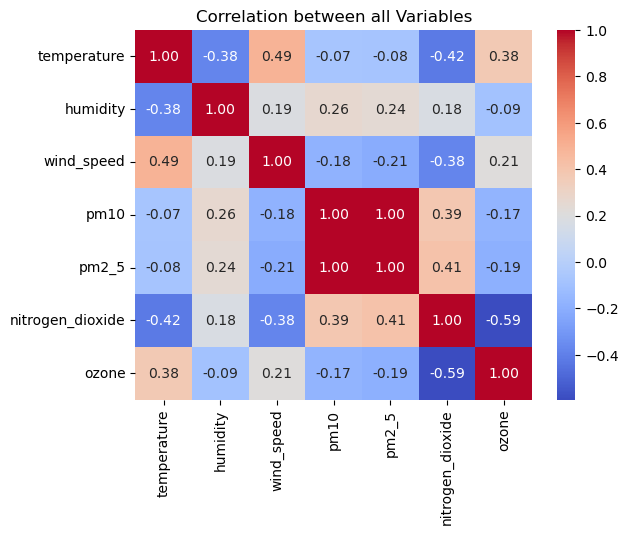

In [92]:
num_columns = ['temperature','humidity','wind_speed','pm10','pm2_5','nitrogen_dioxide','ozone']

sns.heatmap(df[num_columns].corr(), annot=True, cmap='coolwarm',fmt=".2f")
plt.title('Correlation between all Variables')
plt.show()


# "Boxplot of all Numeric Columns"

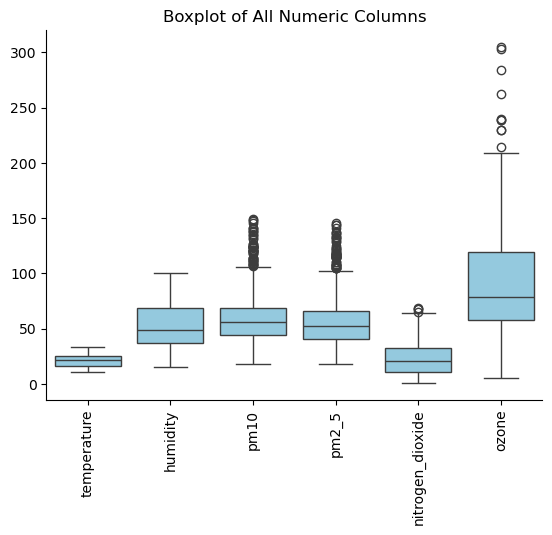

In [93]:
num_columns = ['temperature','humidity','pm10','pm2_5','nitrogen_dioxide','ozone']

sns.boxplot(data=df[num_columns],color='skyblue')
plt.xticks(rotation=90)
plt.title('Boxplot of All Numeric Columns')
sns.despine()
plt.show()

# "MIN & MAX PM10 AND PM2.5"

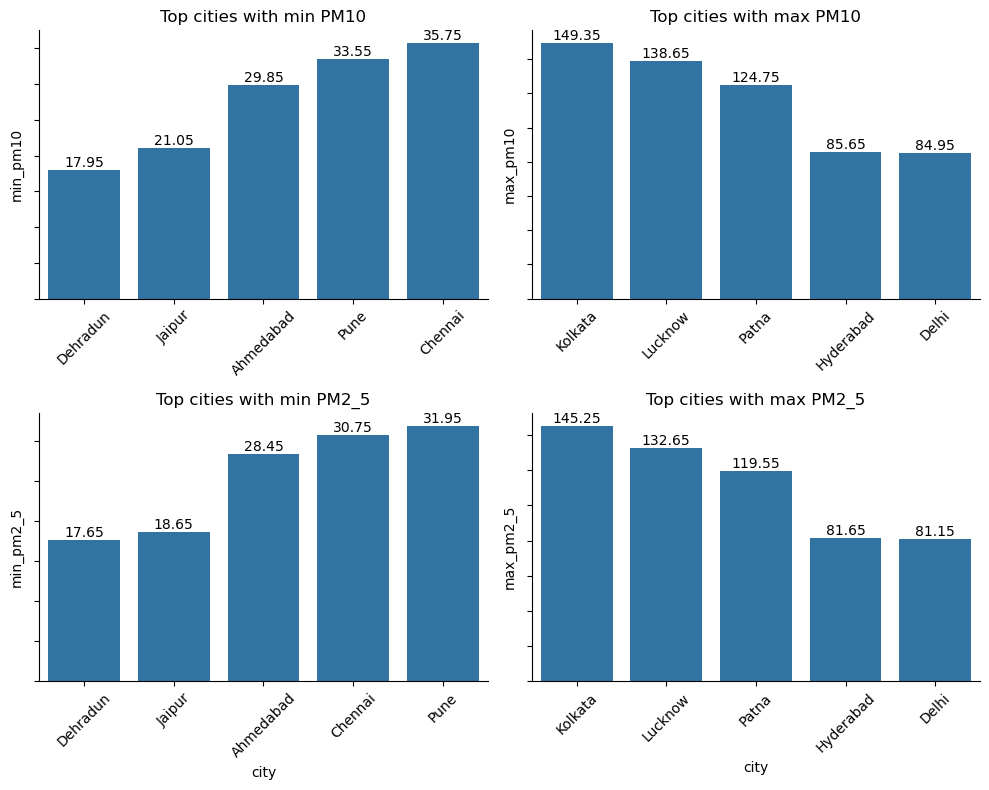

In [94]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.barplot(data=df_min_pm10, x='city',y='min_pm10', ax=axes[0,0])
axes[0,0].set_title("Top cities with min PM10")
axes[0,0].bar_label(axes[0,0].containers[0])

sns.barplot(data=df_max_pm10, x='city',y='max_pm10', ax=axes[0,1])
axes[0,1].set_title("Top cities with max PM10")
axes[0,1].bar_label(axes[0,1].containers[0])

sns.barplot(data=df_min_pm2_5, x='city',y='min_pm2_5', ax=axes[1,0])
axes[1,0].set_title("Top cities with min PM2_5")
axes[1,0].bar_label(axes[1,0].containers[0])

sns.barplot(data=df_max_pm2_5, x='city',y='max_pm2_5', ax=axes[1,1])
axes[1,1].set_title("Top cities with max PM2_5")
axes[1,1].bar_label(axes[1,1].containers[0])

for ax in axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45)

for ax in axes.flat:
    ax.set_yticklabels([])   # removes numbers

for ax in axes[0]:
    ax.set_xlabel('')

sns.despine()
plt.tight_layout()
plt.show()

In [95]:
df_avg_temp = pd.read_sql("""
SELECT
    city,
    ROUND(AVG(temperature)::numeric) AS avg_temp
FROM weather_data
GROUP BY city
ORDER BY avg_temp DESC
LIMIT 10""", engine)


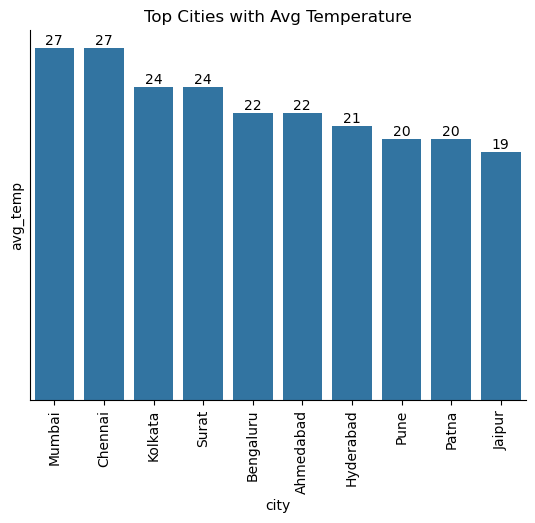

In [96]:
ax = sns.barplot(df_avg_temp, x='city', y='avg_temp')
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0])
ax.set_yticks([])
plt.title("Top Cities with Avg Temperature")
sns.despine()
plt.show()